# NOPD Use of Force Incidents

## I. Introduction

In [1]:
# Importing essential libraries and configurations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import seaborn as sns

%matplotlib inline
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [2]:
plt.style.use('classic')

In [3]:
# loading the data to remove duplicates initially 
df_with_duplicates = pd.read_csv(r'C:\Users\Robert\Downloads\NOPD_Use_of_Force_Incidents.csv')

df = df_with_duplicates.drop_duplicates()

In [4]:
display(df.info())
display(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4815 entries, 0 to 5081
Data columns (total 33 columns):
PIB File Number                4815 non-null object
Date Occurred                  4815 non-null object
Originating Bureau             4815 non-null object
Division level                 4815 non-null object
Division                       4641 non-null object
Unit                           3194 non-null object
Working Status                 3589 non-null object
Shift                          3240 non-null object
Investigation status           4815 non-null object
Disposition                    4810 non-null object
Service Type                   4812 non-null object
Light Condition                4799 non-null object
Weather Condition              4801 non-null object
Use of Force Type              4815 non-null object
Use of Force Level             4815 non-null object
Subject Influencing Factors    4701 non-null object
Use of Force Effective         4815 non-null object
Officer R

None

PIB File Number                   0
Date Occurred                     0
Originating Bureau                0
Division level                    0
Division                        174
Unit                           1621
Working Status                 1226
Shift                          1575
Investigation status              0
Disposition                       5
Service Type                      3
Light Condition                  16
Weather Condition                14
Use of Force Type                 0
Use of Force Level                0
Subject Influencing Factors     114
Use of Force Effective            0
Officer Race/Ethnicity            2
Officer Gender                    2
Officer Age                      58
Officer Years of Service         19
Distance Between                139
Subject Gender                   36
Subject Ethnicity                67
Subject Age                     191
Subject Build                   237
Subject Height                  342
Subject Injured             

## II. Data Scrubbing

In [5]:
def clean_data(df):
    df.rename(columns=lambda x: x.strip().lower().replace(" ", "_"), inplace=True)
    """Cleansing the following columns of null values"""
    clean_col = ['division', 
                 'officer_age', 
                 'officer_years_of_service',
                 'subject_age', 
                 'subject_ethnicity', 
                 'use_of_force_reason']
    """Converting the following columns to categories"""
    cat_col = ['originating_bureau', 
               'division_level', 
               'division', 
               'unit', 
               'investigation_status', 
               'service_type', 
               'light_condition', 
               'weather_condition', 
               'use_of_force_type', 
               'use_of_force_level']
    """Converting the following columns from float to integer"""
    int_col = ['officer_years_of_service', 
               'subject_age', 
               'officer_age', ]
    df.dropna(subset=clean_col, 
              inplace=True)
    d = {'Yes': True, 'No': False}
    df[cat_col] = df[cat_col].astype('category')
    df[int_col] = df[int_col].astype('int64')
    df['use_of_force_effective'] = df['use_of_force_effective'].map(d)
    df['officer_injured'] = df['officer_injured'].map(d)
    df['subject_injured'] = df['subject_injured'].map(d)
    df['subject_hospitalized'] = df['subject_hospitalized'].map(d)
    df['subject_arrested'] = df['subject_arrested'].map(d)
    df['use_of_force_effective'] = df['use_of_force_effective'].astype('bool')
    df['officer_injured'] = df['officer_injured'].astype('bool')
    df['subject_injured'] = df['subject_injured'].astype('bool')
    df['subject_hospitalized'] = df['subject_hospitalized'].astype('bool')
    df['subject_arrested'] = df['subject_arrested'].astype('bool')
    """Converting and setting the index out of the 'date_occurred' column"""
    df['date_occurred'] = df['date_occurred'].astype('datetime64')
    df.set_index('date_occurred', 
                 inplace=True)
    df.sort_index(inplace=True)
    return df
df = clean_data(df)

In [6]:
display(df.info())
display(df.isnull().sum())
display(df.head())
display(df.tail())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4355 entries, 2016-01-01 to 2019-11-30
Data columns (total 32 columns):
pib_file_number                4355 non-null object
originating_bureau             4355 non-null category
division_level                 4355 non-null category
division                       4355 non-null category
unit                           2943 non-null category
working_status                 3242 non-null object
shift                          2924 non-null object
investigation_status           4355 non-null category
disposition                    4355 non-null object
service_type                   4355 non-null category
light_condition                4343 non-null category
weather_condition              4344 non-null category
use_of_force_type              4355 non-null category
use_of_force_level             4355 non-null category
subject_influencing_factors    4283 non-null object
use_of_force_effective         4355 non-null bool
officer_race/ethnicity   

None

pib_file_number                   0
originating_bureau                0
division_level                    0
division                          0
unit                           1412
working_status                 1113
shift                          1431
investigation_status              0
disposition                       0
service_type                      0
light_condition                  12
weather_condition                11
use_of_force_type                 0
use_of_force_level                0
subject_influencing_factors      72
use_of_force_effective            0
officer_race/ethnicity            0
officer_gender                    0
officer_age                       0
officer_years_of_service          0
distance_between                 95
subject_gender                    0
subject_ethnicity                 0
subject_age                       0
subject_build                   188
subject_height                  261
subject_injured                   0
subject_hospitalized        

,pib_file_number,originating_bureau,division_level,division,unit,working_status,shift,investigation_status,disposition,service_type,light_condition,weather_condition,use_of_force_type,use_of_force_level,subject_influencing_factors,use_of_force_effective,officer_race/ethnicity,officer_gender,officer_age,officer_years_of_service,distance_between,subject_gender,subject_ethnicity,subject_age,subject_build,subject_height,subject_injured,subject_hospitalized,subject_arrested,subject_arrest_charges,use_of_force_reason,officer_injured
date_occurred,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-01-01,FTN2016-0001,FOB - Field Operations Bureau,2nd District,C Platoon,NaN,NaN,NaN,Completed,Use Of Force Authorized,Arresting,Poor,Clear Conditions,CEW Exhibited/Laser,L1,Alchohol and unknown drugs,False,Black,Male,32,4,0 feet to 1 feet,Male,Black,29,Large,> 6'3'',True,False,True,NaN,Resisting Lawful Arrest,False
2016-01-01,FTN2016-0001,FOB - Field Operations Bureau,2nd District,C Platoon,NaN,NaN,NaN,Completed,Use Of Force Authorized,Arresting,Poor,Clear Conditions,Force (Escort Tech),L1,Alchohol and unknown drugs,True,Black,Male,32,4,0 feet to 1 feet,Male,Black,29,Large,> 6'3'',True,False,True,NaN,Resisting Lawful Arrest,False
2016-01-01,FTN2016-0001,FOB - Field Operations Bureau,2nd District,C Platoon,NaN,NaN,NaN,Completed,Use Of Force Authorized,Arresting,Poor,Clear Conditions,Force (Take Down),L2,Alchohol and unknown drugs,True,Black,Male,47,13,0 feet to 1 feet,Male,Black,29,Large,> 6'3'',True,False,True,NaN,Resisting Lawful Arrest,False
2016-01-01,FTN2016-0003,ISB - Investigations and Support Bureau,Criminal Investigations Division,Homicide Section,Squad E,NaN,NaN,Completed,Use Of Force Authorized,Call for Service,Good,Clear Conditions,Force (Take Down),L2,Unknown,True,White,Male,31,11,0 feet to 1 feet,Male,White,19,Medium,5'7'' to 5'9'',False,False,True,NaN,Battery on Police Officer,False
2016-01-01,FTN2016-0004,FOB - Field Operations Bureau,8th District,C Platoon,Patrol,NaN,NaN,Completed,Use Of Force Authorized,Arresting,Good,Rainy Conditions - Heavy,Hands,L1,Unknown,True,Hispanic,Male,36,7,0 feet to 1 feet,Male,Black,22,Small,5'4'' to 5'6'',False,False,True,Illegal Carrying of a Weapon,Resisting Lawful Arrest,False


,pib_file_number,originating_bureau,division_level,division,unit,working_status,shift,investigation_status,disposition,service_type,light_condition,weather_condition,use_of_force_type,use_of_force_level,subject_influencing_factors,use_of_force_effective,officer_race/ethnicity,officer_gender,officer_age,officer_years_of_service,distance_between,subject_gender,subject_ethnicity,subject_age,subject_build,subject_height,subject_injured,subject_hospitalized,subject_arrested,subject_arrest_charges,use_of_force_reason,officer_injured
date_occurred,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2019-11-21,FTN2019-0353,FOB - Field Operations Bureau,3rd District,Task Force A,Task Force A,Regular Working,Unknown Shift Hours,Completed,UOF Justified,Call for Service,Good,Clear Conditions,Hands,L1,None detected,False,White,Female,28,1,1 feet to 3 feet,Male,Black,57,Large,5'10'' to 6'0'',False,False,True,NaN,Resisting Lawful Arrest,False
2019-11-22,FTN2019-0356,FOB - Field Operations Bureau,5th District,C Platoon,Patrol,Regular Working,Between 11pm-7am,Completed,UOF Justified,Call for Service,Good,Clear Conditions,Firearm (Exhibited),L1,Unknown,True,Black,Female,32,2,15 feet to 18 feet,Male,White,64,Medium,6'1'' to 6'3'',False,False,True,NaN,Weapon Exhibited,False
2019-11-22,FTN2019-0356,FOB - Field Operations Bureau,5th District,C Platoon,Patrol,Regular Working,Between 11pm-7am,Completed,UOF Justified,Call for Service,Good,Clear Conditions,Firearm (Exhibited),L1,Unknown,True,White,Male,28,0,15 feet to 18 feet,Male,White,64,Medium,6'1'' to 6'3'',False,False,True,NaN,Weapon Exhibited,False
2019-11-27,FTN2019-0363,FOB - Field Operations Bureau,8th District,B Platoon,NaN,Unknown Working Status,Unknown Shift Hours,Initial,Pending,Arresting,Good,Clear Conditions,Takedown (no injury),L1,Mentally unstable,True,White,Female,39,2,7 feet to 10 feet,Female,Black,39,Large,5'4'' to 5'6'',False,True,True,NaN,Resisting Lawful Arrest,False
2019-11-30,FTN2019-0365,FOB - Field Operations Bureau,2nd District,Narcotics,NaN,Regular Working,Between 3pm-11pm,Completed,UOF Justified,Call for Service,Good,Clear Conditions,Firearm (Exhibited),L1,None detected,True,White,Male,32,3,1 feet to 3 feet,Male,Black,30,Medium,5'0'' to 5'3'',False,False,True,NaN,Weapon Exhibited,False


## III. Exploratory Analysis

### Examining the officer data according to different variables... 

division
1st District                        37.857143
1st Platoon                         38.879630
2nd District                        33.400000
2nd Platoon                         33.838235
3rd District                        37.125000
3rd Platoon                         37.500000
4th District                        36.739130
5th District                        32.851852
6th District                        42.000000
7th District                        34.789474
8th District                        36.396226
A Platoon                           39.437799
Admin                               29.333333
Administration                      49.000000
B Platoon                           33.704581
Bourbon Promenade                   37.705128
C Platoon                           34.974057
CID Staff                           54.000000
Compliance Section                  51.000000
Court Liaison                       53.000000
Crime Prevention/Quality of Life    41.000000
D.I.U.                   

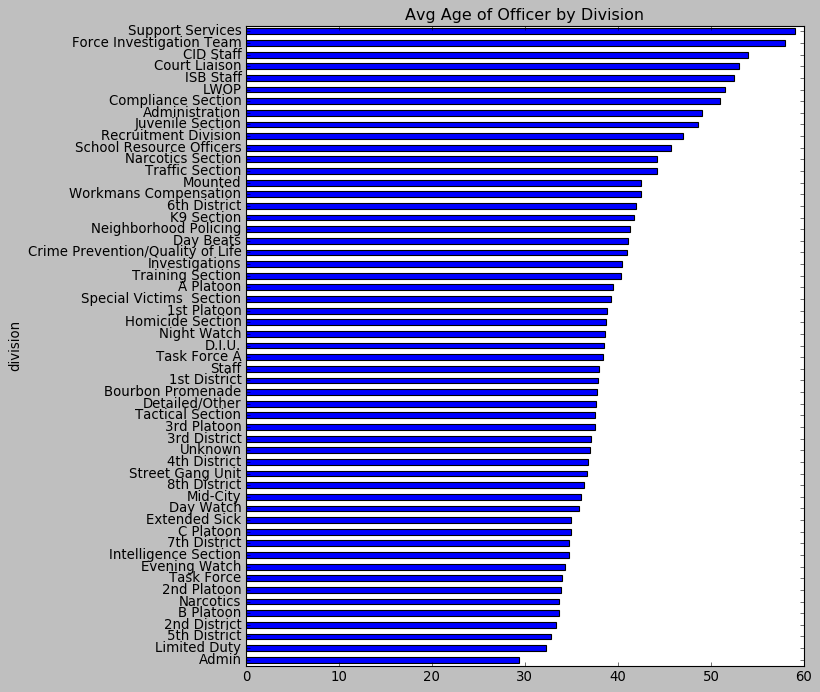

--------------------------------------------


officer_injured,False,True
officer_race/ethnicity,,
American Ind,2,1
Asian/Pacif,18,0
Asian/Pacifi,77,6
Black,1685,193
Hispanic,192,37
Not Specifie,31,2
Race-Unknown,6,2
White,1839,264


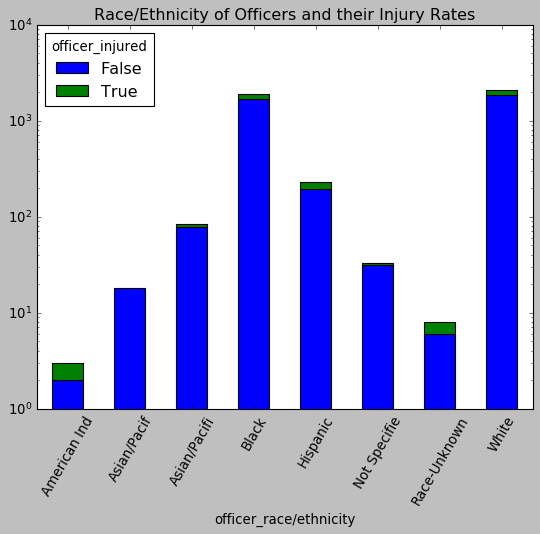

officer_race/ethnicity
American Ind    29.333333
Asian/Pacif     34.000000
Asian/Pacifi    30.469880
Black           37.160277
Hispanic        33.943231
Not Specifie    29.393939
Race-Unknown    29.750000
White           36.109368
Name: officer_age, dtype: float64

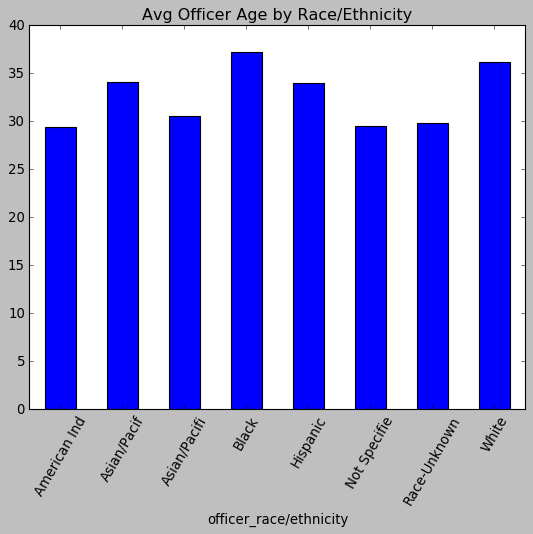

---------------------------------------------


officer_race/ethnicity
American Ind       3
Asian/Pacif       18
Asian/Pacifi      83
Black           1878
Hispanic         229
Not Specifie      33
Race-Unknown       8
White           2103
Name: officer_age, dtype: int64

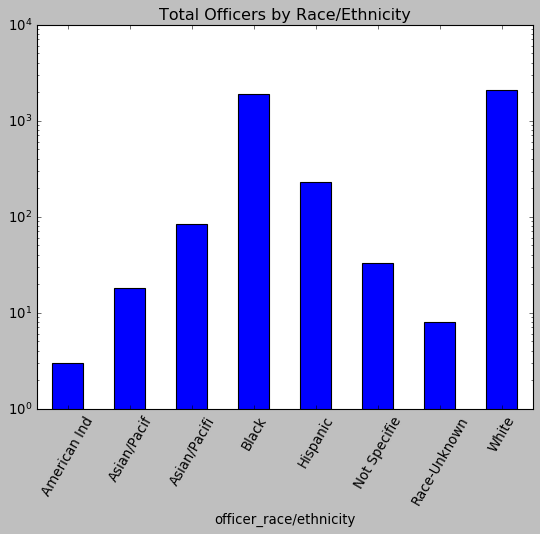

In [7]:
figsize=[20,10]

display(df.groupby(df['division'])['officer_age'].mean())
df.groupby(df['division'])['officer_age'].mean().sort_values().plot.barh(figsize=(9,10), 
                                                                         fontsize=12)
plt.title('Avg Age of Officer by Division')
plt.show()

print('--------------------------------------------')
off_ethn_injd = pd.crosstab(df['officer_race/ethnicity'], df['officer_injured'])
display(off_ethn_injd)

off_ethn_injd.plot.bar(stacked=True, 
                       logy=True,   
                       rot=60)
plt.title('Race/Ethnicity of Officers and their Injury Rates')
plt.show()

off_age_ethn = df.groupby(df['officer_race/ethnicity'])['officer_age'].mean()

display(off_age_ethn)

off_age_ethn.plot.bar(fontsize=12, 
                      rot=60)
plt.title('Avg Officer Age by Race/Ethnicity')
plt.show()

off_age_ethn = df.groupby(df['officer_race/ethnicity'])['officer_age'].count()

print('---------------------------------------------')
display(off_age_ethn)

off_age_ethn.plot.bar(fontsize=12, 
                      logy=True,  
                      rot=60)
plt.title('Total Officers by Race/Ethnicity')
plt.show()

### Examining the subject data according to a few variables...

Unknown                       1898
None detected                 1184
Mentally unstable              520
Alchohol                       345
Unknown Drugs                  191
Alchohol and unknown drugs     145
Name: subject_influencing_factors, dtype: int64

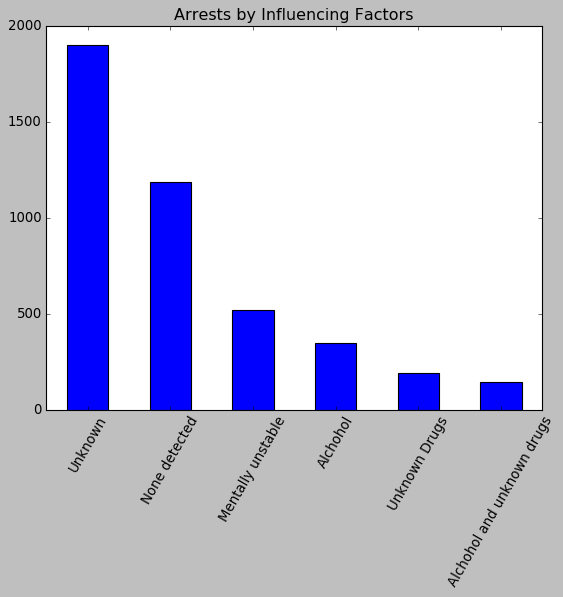

subject_influencing_factors
Alchohol                      35.617391
Alchohol and unknown drugs    31.255172
Mentally unstable             33.105769
None detected                 25.855574
Unknown                       28.204426
Unknown Drugs                 30.455497
Name: subject_age, dtype: float64

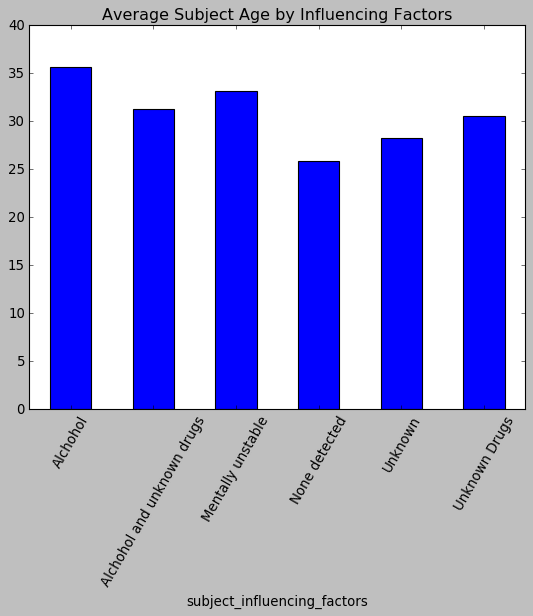

subject_influencing_factors,Alchohol,Alchohol and unknown drugs,Mentally unstable,None detected,Unknown,Unknown Drugs
subject_age,,,,,,
0,3,10,6,22,46,4
1,2,0,0,2,4,0
6,0,0,0,3,0,0
8,0,0,0,9,0,0
9,0,0,1,0,0,0
10,0,0,2,0,0,0
11,0,0,2,1,9,0
12,0,0,0,0,5,0
13,0,0,1,6,8,0


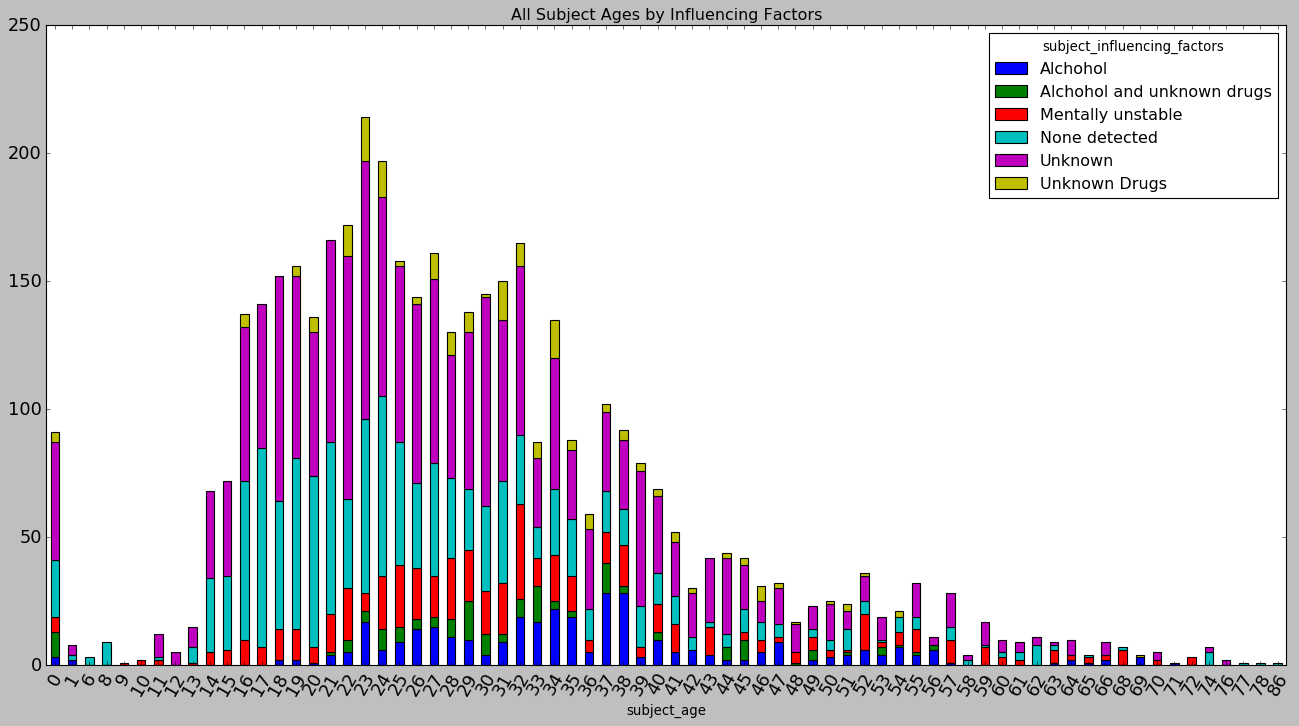

subject_arrested
False    31.061556
True     28.395821
Name: subject_age, dtype: float64

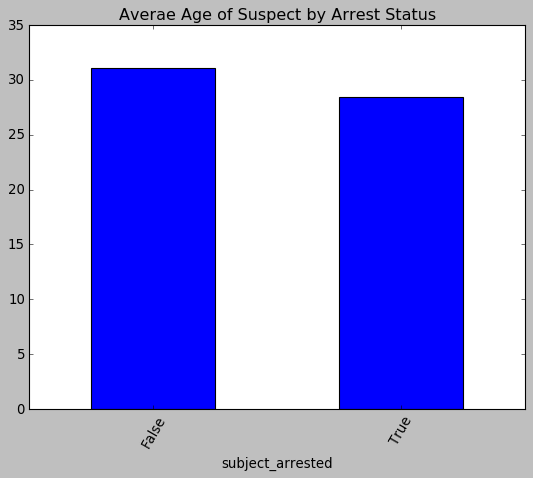

subject_arrested,False,True
weather_condition,,
Clear Conditions,791,3240
Foggy Condition,10,18
Other,24,55
Rainy Conditions - Heavy,2,4
Rainy Conditions - Light,24,138
Rainy Conditions - Medium,8,30


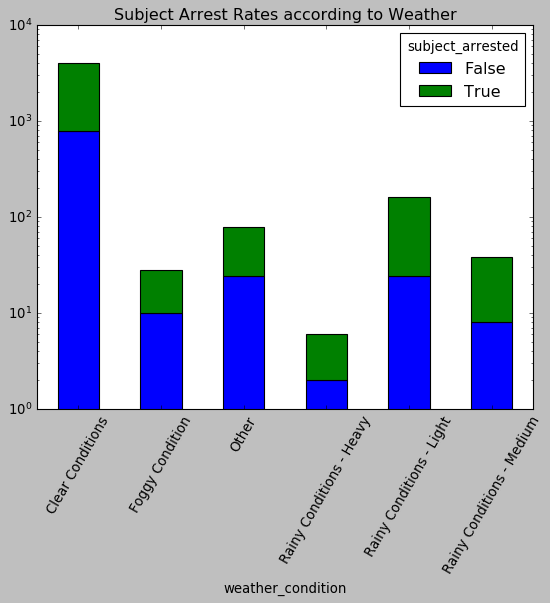

subject_arrested,False,True
subject_ethnicity,,
Asian,7,8
Black,688,3014
Hispanic,16,67
Indian,1,2
Race-Unknown,2,13
W,4,0
White,143,390


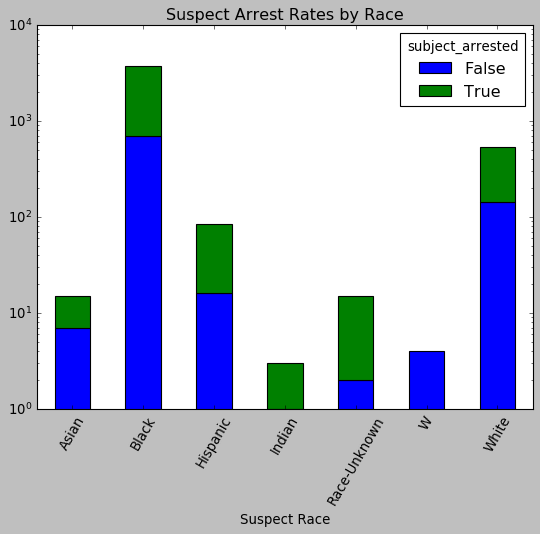

subject_hospitalized,False,True
subject_ethnicity,,
Asian,7,8
Black,2450,1252
Hispanic,59,24
Indian,3,0
Race-Unknown,11,4
W,4,0
White,271,262


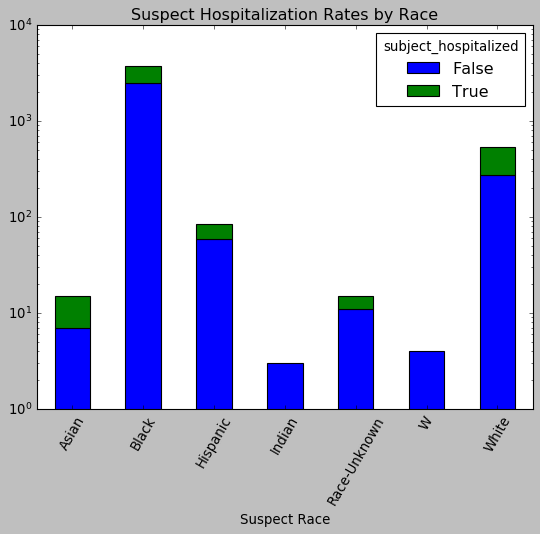

In [8]:
display(df.subject_influencing_factors.value_counts())
df.subject_influencing_factors.value_counts().plot.bar(rot=60, 
                                                       fontsize=12)
plt.title('Arrests by Influencing Factors')
plt.show()

display(df.groupby(df['subject_influencing_factors'])['subject_age'].mean())

df.groupby(df['subject_influencing_factors'])['subject_age'].mean().plot.bar(rot=60, 
                                                                             fontsize=12)
plt.title('Average Subject Age by Influencing Factors')
plt.show()

avg_subj_age_infl = pd.crosstab(df.subject_age, df.subject_influencing_factors)
display(avg_subj_age_infl)
avg_subj_age_infl.plot.bar(figsize=figsize, 
                           stacked=True, 
                           fontsize=16,  
                           rot=60)
plt.title('All Subject Ages by Influencing Factors')
plt.show()

display(df.groupby(df['subject_arrested'])['subject_age'].mean())
df.groupby(df['subject_arrested'])['subject_age'].mean().plot.bar(fontsize=12, 
                                                                  rot=60)
plt.title('Averae Age of Suspect by Arrest Status')
plt.show()


wthr_arrst = pd.crosstab(df.weather_condition, df.subject_arrested)
display(wthr_arrst)

pd.crosstab(df.weather_condition, df.subject_arrested).plot.bar(stacked=True, 
                                                                fontsize=12, 
                                                                logy=True,  
                                                                rot=60)
plt.title('Subject Arrest Rates according to Weather')
plt.show()

# svc_ethn = pd.crosstab(df.service_type, df.subject_ethnicity)
#display(svc_ethn)

#svc_ethn.plot.bar(stacked=True, 
#                  rot=60)
#plt.title('Suspect Ethnicity by Service Type')
#plt.ylabel('Total Incidents')
#plt.show()

sbj_arrst_ethn = pd.crosstab(df.subject_ethnicity, df.subject_arrested)
display(sbj_arrst_ethn)

sbj_arrst_ethn.plot.bar(stacked=True, 
                        fontsize=12, 
                        logy=True, 
                        rot=60)
plt.title('Suspect Arrest Rates by Race')
plt.xlabel('Suspect Race')
plt.show()

sbjct_hosp_race = pd.crosstab(df.subject_ethnicity, df.subject_hospitalized)
display(sbjct_hosp_race)

sbjct_hosp_race.plot.bar(stacked=True, 
                         fontsize=12, 
                         logy=True,   
                         rot=60)
plt.title('Suspect Hospitalization Rates by Race')
plt.xlabel('Suspect Race')
plt.show()

### Comparing officer and subject numerical data...

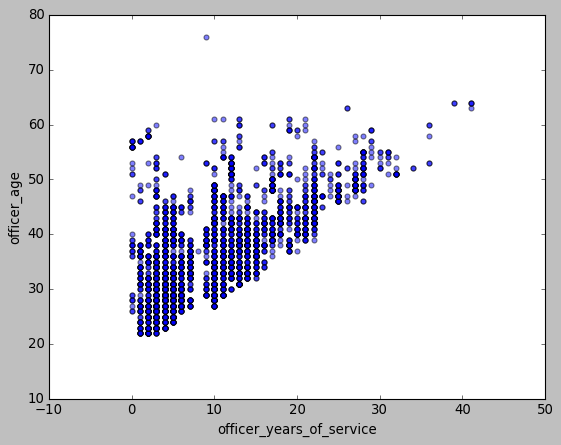

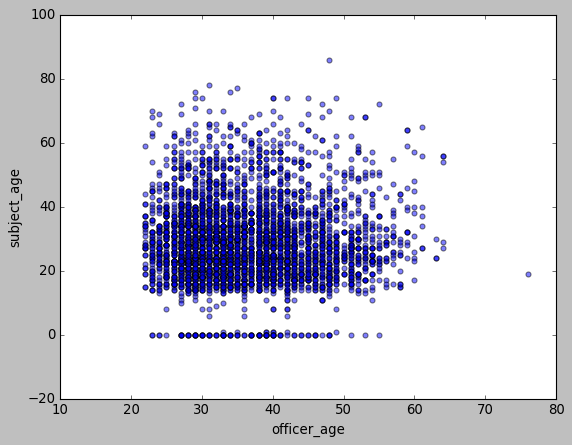

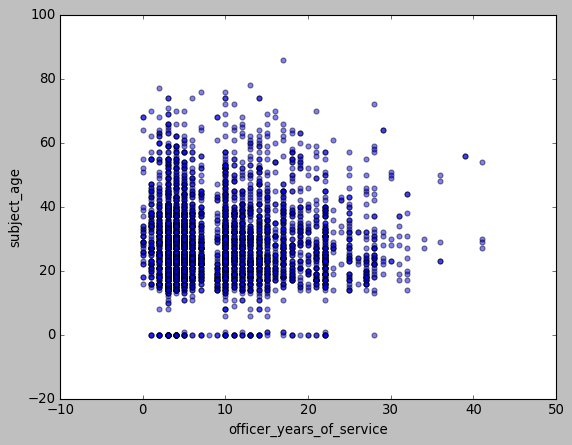

In [9]:
df.plot.scatter(x='officer_years_of_service', 
                y='officer_age', 
                alpha=0.5)
plt.show()

df.plot.scatter('officer_age', 
                'subject_age', 
                alpha=0.5)
plt.show()

df.plot.scatter('officer_years_of_service', 
                'subject_age', 
                alpha = 0.5)
 
plt.show()

Well duh! Officer age and years of service are the only variables that are remotely strongly correlated. 